# <center> **CS 391, Spring 2021, Homework 9**
### <center> Due **Tuesday, April 13, 11:59 pm ET (Boston time)**, via Gradescope




###**Submission guidelines** 
Please write your solutions inside of this .ipynb file, then convert it to a PDF before submitting on Gradescope:

*   **In Jupyter:** File > Download as > PDF
*   **In Google Colab:** File > Print > Destination > Save as PDF

When you submit, please **be sure to match the answers on your PDF to the outline on Gradescope.** In other words, if the answer to problem 2.1 is on pages 2 and 3 of your PDF, please be sure to select those pages as the answer to problem 2.1 on Gradescope. Since it takes significantly longer to grade homework that is not properly matched, **we may deduct points** for noncompliant submissions.

The lab on Wednesday 1/27 covers how to get started with the notebooks for writing problem solutions and running experiments. In case you haven't done so, please sign up to the course Gradescope, with the access code **ERV7B2**: https://www.gradescope.com/courses/232562.

<div style="page-break-after: always;"></div>

###**1. Data Analysis**

This week, we'll be looking at the famous Titanic dataset, which contains information about XXXX passengers aboard the ill-fated 1912 maiden voyage of the RMS *Titanic*.  The dataset has the following features:

![picture](https://drive.google.com/uc?id=1cwD2KjEFhXvvrp6PwCzZ_a5AlSeujbOR)

We will use a few different methods to 

In [11]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

titanic = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/titanic.csv')
titanic = titanic.replace('?', np.NaN)
# titanic

** **bold text**Part 1.0** 

**You do not have to do anything for this problem.  However, you should understand how all of this code works and why it's being done.**

We will use each sample's passenger class, sex, age, sibsp, parch, fare, and embarkment point to predict whether the passenger survived. But first, let's start by cleaning up our data:

1. Select the only columns you need out of the dataset, and then drop all rows that have one or more NaN values.  Note many samples you lose by doing this.

2. We can't perform SVM or logistic regression on categorical variables, so encode the "sex" feature as 1 for male, 0 for female.

3. We must also convert the "embarked" feature into numerical data.  However, since there are three categories, we change "embarked" into three one-hot columns: one each for Cherbourg, Queenstown, and Southampton.

4. Finally, randomly select 75% of you $X$ and $y$ values for training, and reserve the remaining 25% for testing. **NOTE:** *Every time you re-run SciKit Learn's* train_test_split, *it will randomly select a new testing set.  To keep your results consisent every time you run the code, I have set the parameter* **random_state = 1234**.

In [3]:
# Answer:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# choose only the columns you want, and drop NaNs
df = titanic[['pclass', 'sex','age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]
a = df.shape[0]
df = df.dropna()
b = df.shape[0]
print("By dropping NaN values, we lose", a-b, "samples.")

# encode female as 0 and male as 1
df['male'] = LabelEncoder().fit_transform(df.sex)

# one-hot encode embark
df = pd.concat([df,pd.get_dummies(df['embarked'], prefix='embarked')],axis=1)

#drop original categorical columns
df = df.drop(['sex', 'embarked'], axis=1)

y = df.survived
X = df.drop(['survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1234)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

By dropping NaN values, we lose 266 samples.


**Part 1.1**

First, let's train a Logistic Regression to classify our data.  Do this with SciKit Learn's SGDClassifier, with the **loss** parameter set to the appropriate loss function for SVMs. Please set **random_state=1234** for replicability.  You can read more about SGDClassifier in the documentation here:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

We can set a parameter for SGDClassifier called **max_iter**, which limits the number of gradient descent iterations that will be used to find the optimal classifier.  Please create classifiers using 4,6,8, 10 iterations, and plot ROC curve and AUC score for each.

**NOTE:** *When you predict on* **X_test**, *use the method* **predict_proba()** instead of **predict()**.  *This will give you a probability that each point is classified as 1, as opposed to a prediction of either 0 or 1.*

/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of ite

<AxesSubplot:>

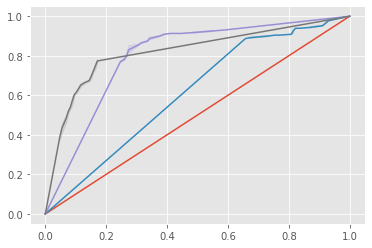

In [7]:
# Answer:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.linear_model import SGDClassifier
SGD_w4 = SGDClassifier(random_state = 1234, loss = 'log', max_iter = 4)
SGD_w4.fit(X_train, y_train)
x_w4_fin = SGD_w4.predict_proba(X_test)[::,1]
SGD_w6 = SGDClassifier(random_state = 1234, loss = 'log', max_iter = 6)
SGD_w6.fit(X_train, y_train)
x_w6_fin = SGD_w6.predict_proba(X_test)[::,1]
SGD_w8 = SGDClassifier(random_state = 1234, loss = 'log', max_iter = 8)
SGD_w8.fit(X_train, y_train)
x_w8_fin = SGD_w8.predict_proba(X_test)[::,1]
SGD_w10 = SGDClassifier(random_state = 1234, loss = 'log', max_iter = 10)
SGD_w10.fit(X_train, y_train)
x_w10_fin = SGD_w10.predict_proba(X_test)[::,1]


f, t, _ = roc_curve(y_test, x_w4_fin)
sns.lineplot(f, t)
f, t, _ = roc_curve(y_test, x_w6_fin)
sns.lineplot(f, t)
f, t, _ = roc_curve(y_test, x_w8_fin)
sns.lineplot(f, t)
f, t, _ = roc_curve(y_test, x_w10_fin)
sns.lineplot(f, t)




    

**Part 1.2**

Now, let's train a logistic regression without a maximum number of iterations!  (In the default case, the algorithm will max out at 1000 iterations, which should be more than enough.) Keep **random_state=1234** for replicability.  Plot the confusion matrix, and compute the accuracy, precision, recall, and F1-score of your model.

/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


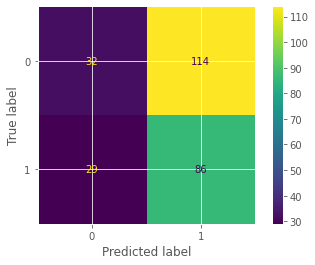

In [9]:
# Answer:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
SGD_wNone = SGDClassifier(random_state = 1234, loss = 'log')
e = SGD_wNone.fit(X_train, y_train)
plot_confusion_matrix(e, X = X_test, y_true = y_test)



Next, let's calculate the accuracy, recall, precision, and F1-Score of this resulted confusion matrix:

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN} = \frac{86 + 32}{32 + 114 + 29 + 86} = \boxed{\frac{118}{261}}$

Recall = $\frac{TP}{TP + FN} = \frac{86}{86 + 29} = \boxed{\frac{86}{115}}$

Precision = $\frac{TP}{TP + FP} = \frac{86}{86 + 114} = \frac{86}{200} = \boxed{\frac{43}{100}}$

$$F_1 Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2\cdot \frac{\frac{43}{100} \cdot \frac{86}{115}}{\frac{43}{100} + \frac{86}{115}} = \frac{\frac{3698}{5750}}{\frac{2709}{2300}} = \boxed{\frac{172}{315}}$$


**Part 1.3**

Now let's train a SVM to classify our data.  We may also do this with SciKit Learn's SGDClassifier, but now with the **loss** parameter set to the appropriate loss function for SVMs. Again, please set **random_state=1234** for replicability.  Plot the confusion matrix, and compute the accuracy, precision, recall, and F1-score of your model.

/Users/shahafdan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


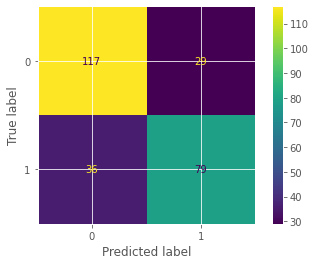

In [10]:
# Answer:
dm = SGDClassifier(random_state = 1234)
e = dm.fit(X_train, y_train)
plot_confusion_matrix(e, X = X_test, y_true = y_test)


Next, let's calculate the accuracy, recall, precision, and F1-Score of this resulted confusion matrix:

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN} = \frac{117 + 79}{117 + 79 + 29 + 36} = \boxed{\frac{196}{261}}$

Recall = $\frac{TP}{TP + FN} = \frac{79}{79 + 36} = \boxed{\frac{79}{115}}$

Precision = $\frac{TP}{TP + FP} = \frac{79}{79 + 29} = \boxed{\frac{79}{108}}$

$$F_1 Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2\cdot \frac{\frac{79}{108} \cdot \frac{79}{115}}{\frac{79}{108} + \frac{79}{115}} = 2 \cdot \frac{0.5025}{1.418} = \boxed{0.7087}$$


**Part 1.4**

Which model would you choose as the better classifier for this data set: logistic regression or SVM?  Why?

**Answer:**
As seen from our answers above, when we use logistic regression as a data model classifier, we get a lower values for the accuracy, precision, and F1 Score than when we use SVMs. Therefore, I would rather and prefer using SVM.